# Question2

In [1]:
import numpy as np
import pandas as pd
import os
import glob as gb
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from keras import layers, callbacks
from keras.layers import *
from keras.models import *
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing import image
from keras import Sequential
from keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16

2024-04-15 08:14:16.360065: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-15 08:14:17.854516: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Data Preparation

In [2]:
trainpath = r'/home/arj/TriSem3/Deep-learning/Component4/MY_data/train'
testpath = r'/home/arj/TriSem3/Deep-learning/Component4/MY_data/test'
predpath = r'/home/arj/TriSem3/Deep-learning/Component4/MY_data/predict'

for folder in os.listdir(trainpath):
    files = gb.glob(pathname=str(trainpath + "/" + folder + "/*.jpeg"))
    print(f"For training data, found {len(files)} images in folder {folder}")

For training data, found 230 images in folder Apple
For training data, found 230 images in folder pinenapple
For training data, found 230 images in folder kiwi
For training data, found 230 images in folder Banana
For training data, found 230 images in folder avocado
For training data, found 231 images in folder mango
For training data, found 230 images in folder strawberries
For training data, found 230 images in folder orange
For training data, found 230 images in folder cherry
For training data, found 230 images in folder watermelon


In [3]:
for folder in os.listdir(testpath):
    files = gb.glob(pathname=str(testpath + "/" + folder + "/*.jpeg"))
    print(f"For testing data, found {len(files)} images in folder {folder}")

For testing data, found 106 images in folder banana
For testing data, found 105 images in folder pinenapple
For testing data, found 105 images in folder kiwi
For testing data, found 105 images in folder avocado
For testing data, found 105 images in folder mango
For testing data, found 103 images in folder stawberries
For testing data, found 97 images in folder orange
For testing data, found 89 images in folder apple
For testing data, found 105 images in folder cherry
For testing data, found 105 images in folder watermelon


In [4]:
files = gb.glob(pathname=str(predpath+"/*.jpeg"))
print(len(files))

48


In [5]:
classes=sorted(os.listdir(trainpath))
",".join([f"{i}:{c}" for i,c in enumerate(classes)])

'0:Apple,1:Banana,2:avocado,3:cherry,4:kiwi,5:mango,6:orange,7:pinenapple,8:strawberries,9:watermelon'

In [6]:
TRAINING_DIR = trainpath
TESTING_DIR = testpath

train_datagen = ImageDataGenerator(
        rotation_range=15,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        width_shift_range=0.1,
        height_shift_range=0.1,
        rescale=1./255,
        validation_split=0.2
    )


testing_datagen = ImageDataGenerator(
        rotation_range=15,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        width_shift_range=0.1,
        height_shift_range=0.1,
        rescale=1./255
    )

train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    classes=classes,
    color_mode="rgb",
    batch_size=64,
    target_size=(256,256),
    class_mode="categorical",
    subset="training"
)


validation_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    classes=classes,
    color_mode="rgb",
    batch_size=64,
    target_size=(256,256),
    class_mode="categorical",
    subset="validation"
)

testing_generator = train_datagen.flow_from_directory(
    TESTING_DIR,
    classes=list(map(lambda x:x.lower().replace("strawberries","stawberries"),classes)),
    color_mode="rgb",
    batch_size=64,
    target_size=(256,256),
    class_mode="categorical"
)

Found 1841 images belonging to 10 classes.
Found 460 images belonging to 10 classes.
Found 1025 images belonging to 10 classes.


Customized CNN Model

In [7]:

model = tf.keras.models.Sequential([
    layers.RandomRotation(0.1,input_shape=(256,256,3)),
    layers.RandomZoom(0.1),
    layers.RandomFlip(),
    layers.GaussianNoise(0.03),
    #convolutional llayrs
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(4),
    layers.Conv2D(64, 3,  activation='relu'),
    layers.MaxPooling2D(4),
    layers.Conv2D(128, 4,  activation='relu'),
    layers.MaxPooling2D(4),
    layers.Flatten(),
    #Dense layers
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    tf.keras.layers.Dense(len(classes), activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005), 
              loss=tf.keras.losses.CategoricalCrossentropy(), 
              metrics=['accuracy'])
callback_list=[
    callbacks.EarlyStopping(monitor="val_accuracy",patience=10,restore_best_weights=True),
    callbacks.ReduceLROnPlateau(factor=0.8,monitor="val_accuracy",patience=3)
]

/home/arj/anaconda3/envs/clg/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=5,
                    verbose=1,
                    callbacks=callback_list)

Epoch 1/5


/home/arj/anaconda3/envs/clg/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-04-15 08:14:30.148334: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 528515072 exceeds 10% of free system memory.
2024-04-15 08:14:30.972997: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 528515072 exceeds 10% of free system memory.


 1/29 ━━━━━━━━━━━━━━━━━━━━ 5:30 12s/step - accuracy: 0.0938 - loss: 2.2885

2024-04-15 08:14:33.265406: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 528515072 exceeds 10% of free system memory.
2024-04-15 08:14:34.676438: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 528515072 exceeds 10% of free system memory.


 2/29 ━━━━━━━━━━━━━━━━━━━━ 1:44 4s/step - accuracy: 0.1016 - loss: 2.5738 

2024-04-15 08:14:37.019740: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 528515072 exceeds 10% of free system memory.


29/29 ━━━━━━━━━━━━━━━━━━━━ 116s 4s/step - accuracy: 0.0957 - loss: 2.4192 - val_accuracy: 0.2087 - val_loss: 2.0528 - learning_rate: 0.0050
Epoch 2/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 100s 3s/step - accuracy: 0.2073 - loss: 2.0896 - val_accuracy: 0.1957 - val_loss: 1.8886 - learning_rate: 0.0050
Epoch 3/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 102s 3s/step - accuracy: 0.1738 - loss: 1.9668 - val_accuracy: 0.2304 - val_loss: 1.8388 - learning_rate: 0.0050
Epoch 4/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 99s 3s/step - accuracy: 0.2057 - loss: 1.8844 - val_accuracy: 0.2304 - val_loss: 1.8756 - learning_rate: 0.0050
Epoch 5/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 97s 3s/step - accuracy: 0.2171 - loss: 1.8943 - val_accuracy: 0.2326 - val_loss: 1.8310 - learning_rate: 0.0050


In [9]:
acc_cnn=history.history['accuracy']
val_acc_cnn=history.history['val_accuracy']
loss_cnn=history.history['loss']
val_loss_cnn=history.history['val_loss']

epochs_cnn=range(len(acc_cnn)) # Get number of epochs

In [10]:
model.evaluate(testing_generator)

17/17 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.2249 - loss: 1.8499


[1.867055892944336, 0.22634145617485046]

In [11]:
model.evaluate(validation_generator)

8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.2523 - loss: 1.8546


[1.825323462486267, 0.239130437374115]

Transfer Learning with VGG-16

In [12]:
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

for layer in vgg16_base.layers:
    layer.trainable = False

vgg16_model = Sequential([
    vgg16_base,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(classes), activation='softmax')
])

vgg16_model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

vgg16_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [13]:
history_vgg16 = vgg16_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=5,
    verbose=1,
    callbacks=callback_list
)

Epoch 1/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 1324s 46s/step - accuracy: 0.1007 - loss: 3.2344 - val_accuracy: 0.1457 - val_loss: 2.1987 - learning_rate: 0.0010
Epoch 2/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 1361s 47s/step - accuracy: 0.1455 - loss: 2.2391 - val_accuracy: 0.2130 - val_loss: 2.1673 - learning_rate: 0.0010
Epoch 3/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 1326s 46s/step - accuracy: 0.1740 - loss: 2.1823 - val_accuracy: 0.2957 - val_loss: 2.0457 - learning_rate: 0.0010
Epoch 4/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 1144s 40s/step - accuracy: 0.1893 - loss: 2.1468 - val_accuracy: 0.3196 - val_loss: 1.9937 - learning_rate: 0.0010
Epoch 5/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 1141s 39s/step - accuracy: 0.2052 - loss: 2.0976 - val_accuracy: 0.3261 - val_loss: 1.9265 - learning_rate: 0.0010


Sir, I have tried the epochs of 10, 2 and 1 as the kernal was crashing when epochs 10 is applied and when epochs odf 2 is given it was taking toomuch time to complete as of the time constrain i have to intruppt the code block then and finalize with epoch of 1

In [16]:
acc_vgg16 = history_vgg16.history['accuracy']
val_acc_vgg16 = history_vgg16.history['val_accuracy']
loss_vgg16 = history_vgg16.history['loss']
val_loss_vgg16 = history_vgg16.history['val_loss']
epochs = range(len(acc_vgg16)) 

Evaluation

In [17]:
model.evaluate(testing_generator)#for custom CNN (excuted above also)
model.evaluate(validation_generator)

17/17 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.2264 - loss: 1.8460
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.2596 - loss: 1.8177


[1.8412233591079712, 0.24782608449459076]

In [18]:
vgg16_model.evaluate(testing_generator)#for VGG-16
vgg16_model.evaluate(validation_generator)

17/17 ━━━━━━━━━━━━━━━━━━━━ 612s 36s/step - accuracy: 0.3244 - loss: 1.9302
8/8 ━━━━━━━━━━━━━━━━━━━━ 312s 39s/step - accuracy: 0.3242 - loss: 1.8728


[1.9010095596313477, 0.31086957454681396]

visualization and analysis

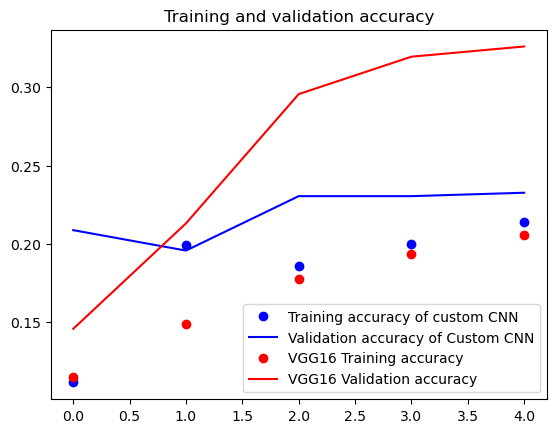

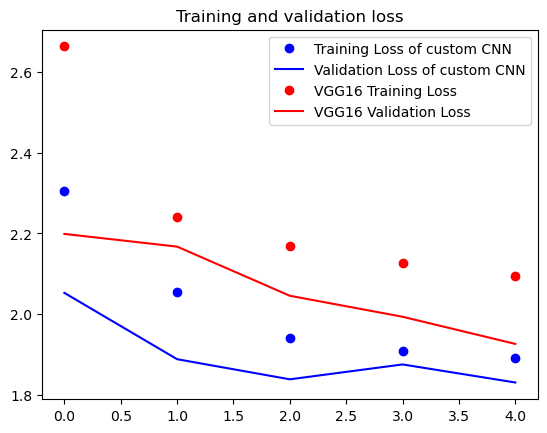

In [19]:
# Plot training and validation accuracy per epoch
plt.plot(epochs, acc_cnn, 'bo', label='Training accuracy of custom CNN')
plt.plot(epochs, val_acc_cnn, 'b', label='Validation accuracy of Custom CNN')
plt.plot(epochs, acc_vgg16, 'ro', label='VGG16 Training accuracy')
plt.plot(epochs, val_acc_vgg16, 'r', label='VGG16 Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss_cnn, 'bo', label='Training Loss of custom CNN')
plt.plot(epochs, val_loss_cnn, 'b', label='Validation Loss of custom CNN')
plt.plot(epochs, loss_vgg16, 'ro', label='VGG16 Training Loss')
plt.plot(epochs, val_loss_vgg16, 'r', label='VGG16 Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


